In [21]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [22]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]
print(open_folder1)
print(Data_test)

['.DS_Store', '.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Test_Foot.csv


Machine Amrta

In [23]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [24]:
# filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
# filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv

In [25]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data
# y prend le score à prédire
y=data.mi_temps_gagnante
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


In [26]:
np.unique(y)

array([0, 1, 2], dtype=int64)

In [27]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [28]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
3


array([2, 1, 2, ..., 0, 2, 2])

In [54]:
def create_model():
    
    model = Sequential()
    model.add(Dense(3, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu')) 
    model.add(Dense(524, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu'))   
    model.add(BatchNormalization())
    model.add(Dense(3, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu')) 
    model.add(Dense(524, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu'))   
    model.add(BatchNormalization())
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [55]:
model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_22 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              132096    
_________________________________________________________________
dense_24 (Dense)             (None, 524)               537100    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               67200     
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              132096    
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)             

In [56]:
save = ModelCheckpoint('model_Foot_mi_temps.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [57]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=200,
                    callbacks = [save])

Train on 9238 samples, validate on 2310 samples
Epoch 1/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0973 - accuracy: 0.4365
Epoch 00001: val_accuracy improved from -inf to 0.44372, saving model to model_Foot_mi_temps.h5
9238/9238 [==============================] - 4s 400us/sample - loss: 1.0969 - accuracy: 0.4365 - val_loss: 1.4287 - val_accuracy: 0.4437
Epoch 2/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0751 - accuracy: 0.4398
Epoch 00002: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 268us/sample - loss: 1.0751 - accuracy: 0.4397 - val_loss: 1.1548 - val_accuracy: 0.4437
Epoch 3/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0756 - accuracy: 0.4346
Epoch 00003: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 3s 275us/sample - loss: 1.0756 - accuracy: 0.4346 - val_loss: 1.0770 - val_accuracy: 0.4394
Epoch 4/200
9180/9238 [===============

Epoch 29/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0805 - accuracy: 0.4336
Epoch 00029: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 267us/sample - loss: 1.0801 - accuracy: 0.4340 - val_loss: 1.0856 - val_accuracy: 0.4303
Epoch 30/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0924 - accuracy: 0.4374
Epoch 00030: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 3s 275us/sample - loss: 1.0918 - accuracy: 0.4382 - val_loss: 2.2412 - val_accuracy: 0.3887
Epoch 31/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0842 - accuracy: 0.4343
Epoch 00031: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 3s 272us/sample - loss: 1.0842 - accuracy: 0.4339 - val_loss: 1.0818 - val_accuracy: 0.4437
Epoch 32/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0775 - accuracy: 0.4377 ETA: 
Epoch 00032: val_a

Epoch 57/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0712 - accuracy: 0.4474
Epoch 00057: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 3s 274us/sample - loss: 1.0710 - accuracy: 0.4474 - val_loss: 1.0812 - val_accuracy: 0.4437
Epoch 58/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0787 - accuracy: 0.4435
Epoch 00058: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 264us/sample - loss: 1.0788 - accuracy: 0.4435 - val_loss: 1.0972 - val_accuracy: 0.4437
Epoch 59/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0752 - accuracy: 0.4447
Epoch 00059: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 270us/sample - loss: 1.0758 - accuracy: 0.4439 - val_loss: 1.0864 - val_accuracy: 0.4303
Epoch 60/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0720 - accuracy: 0.4461 ETA: 0s - loss: 1.0
Epoc

Epoch 85/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0631 - accuracy: 0.4474
Epoch 00085: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 263us/sample - loss: 1.0625 - accuracy: 0.4490 - val_loss: 1.1816 - val_accuracy: 0.2459
Epoch 86/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0621 - accuracy: 0.4495
Epoch 00086: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 3s 314us/sample - loss: 1.0624 - accuracy: 0.4490 - val_loss: 1.0753 - val_accuracy: 0.4437
Epoch 87/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0626 - accuracy: 0.4488
Epoch 00087: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 3s 310us/sample - loss: 1.0622 - accuracy: 0.4490 - val_loss: 1.0738 - val_accuracy: 0.4437
Epoch 88/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0620 - accuracy: 0.4497
Epoch 00088: val_accurac

Epoch 113/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0630 - accuracy: 0.4480
Epoch 00113: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 3s 300us/sample - loss: 1.0625 - accuracy: 0.4490 - val_loss: 1.4541 - val_accuracy: 0.4437
Epoch 114/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0624 - accuracy: 0.4490
Epoch 00114: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 3s 281us/sample - loss: 1.0623 - accuracy: 0.4490 - val_loss: 1.8219 - val_accuracy: 0.2459
Epoch 115/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0617 - accuracy: 0.4506
Epoch 00115: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 3s 277us/sample - loss: 1.0623 - accuracy: 0.4490 - val_loss: 2.0895 - val_accuracy: 0.2459
Epoch 116/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0629 - accuracy: 0.4475
Epoch 00116: val_acc

Epoch 154/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0628 - accuracy: 0.4486
Epoch 00154: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 4s 443us/sample - loss: 1.0623 - accuracy: 0.4490 - val_loss: 1.3490 - val_accuracy: 0.4437
Epoch 155/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0620 - accuracy: 0.4492
Epoch 00155: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 4s 455us/sample - loss: 1.0621 - accuracy: 0.4490 - val_loss: 1.4472 - val_accuracy: 0.4437
Epoch 156/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0617 - accuracy: 0.4496
Epoch 00156: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 4s 435us/sample - loss: 1.0621 - accuracy: 0.4490 - val_loss: 3.2895 - val_accuracy: 0.4437
Epoch 157/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0616 - accuracy: 0.4495
Epoch 00157: val_acc

Epoch 182/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0624 - accuracy: 0.4486
Epoch 00182: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 4s 440us/sample - loss: 1.0622 - accuracy: 0.4490 - val_loss: 1.0759 - val_accuracy: 0.4437
Epoch 183/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0621 - accuracy: 0.4487
Epoch 00183: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 4s 442us/sample - loss: 1.0621 - accuracy: 0.4490 - val_loss: 2.7232 - val_accuracy: 0.4437
Epoch 184/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0623 - accuracy: 0.4484
Epoch 00184: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 4s 431us/sample - loss: 1.0620 - accuracy: 0.4490 - val_loss: 3.6000 - val_accuracy: 0.4437
Epoch 185/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0623 - accuracy: 0.4487
Epoch 00185: val_acc

Text(0, 0.5, 'Accuracy')

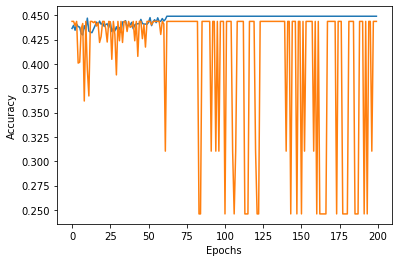

In [58]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [51]:
unique = x_prediction.values
results = []

i = 0
unique[1]
np.unique(y_train)
predictions_final = model.predict(np.array([x_train[59]]))
predictions_final.shape


(1, 3)

In [52]:
model.load_weights("model_Foot_mi_temps.h5")

In [53]:
results = []
zero =[]
un = []
deux = []
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    pred0 =round(predictions_final[0][0],2)
    zero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    un.append(pred1)
    pred2 =round(predictions_final[0][2],2)
    deux.append(pred2)
    results.append(result)
    print(result,predictions_final)

2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674

2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674 0.46045128]]
2 [[0.20599204 0.33355674

In [37]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'mi_temps_gagnante':results}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
1424,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1085,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
1423,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [38]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.json')

In [39]:
finished = []
scheduled = []

In [40]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [41]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","mi_temps_gagnante"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [42]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
2,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
3,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
4,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
82,2020-07-09,279534,FINISHED,450,108,Hellas Verona FC,FC Internazionale Milano,2
83,2020-07-09,273907,FINISHED,89,88,RCD Mallorca,Levante UD,2
84,2020-07-09,273913,FINISHED,278,745,SD Eibar,CD Leganés,2
85,2020-07-09,264674,FINISHED,62,340,Everton FC,Southampton FC,2


In [43]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-11,264686,SCHEDULED,68,563,Norwich City FC,West Ham United FC,2
1,2020-07-11,264689,SCHEDULED,346,67,Watford FC,Newcastle United FC,2
2,2020-07-11,264683,SCHEDULED,64,328,Liverpool FC,Burnley FC,2
3,2020-07-11,264687,SCHEDULED,356,61,Sheffield United FC,Chelsea FC,2
4,2020-07-11,264688,SCHEDULED,397,65,Brighton & Hove Albion FC,Manchester City FC,2
...,...,...,...,...,...,...,...,...
172,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
173,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
174,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
175,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [44]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.json')

In [45]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.json')